Decided to try and learn the algos in the paper (https://arxiv.org/pdf/2401.11737) by trying to implement the algorithms they provided and typing info about them to ensure my understanding is valid.

# Algorithm 1: 
### The paper describes this algorithm's usage as "estimation of fractal dimension of the surface of an atomistic object via box-counting technique."

# Steps for Alg 1:
#### Steps 1 and 2 - Use a nearest neighbor search to identify the neighbors of each atom (Step 1). Due to the nature of Ting et al. data being atomic coordinates, after identifying the nearest-neighbors of each atom, they then need to identify if the atoms are surface or inner atoms (step 2).

#### Step 3 - Using either the Voxelized Point Cloud method or the Mathematically Precise Surface method, do box counting on the data

#### Step 4 - Compute the slope of the log-log plot representing the change in box counts with respect to change in box length, "along with the coefficient of determination $R^2$ and the confidence intervals at the confidence level specified by users".

Due to the nature of our data, we don't have datapoints that are considered inside or under the surface of the land our data is representing. Because of this, we can skip the nearest neighbor search algorithm (step 1) and deciding whether or not the data point is a surface point or not (step 2).

This leaves our focus on Steps 3 and 4. 

Step 4 is relatively straight forward once the data is obtained, so most of the focus here will be on Step 3.

# Voxelized Point Cloud
This method requires us to either use the data as-is or estimated, and running the basic box-counting algorithm for this data. The "pre-group work" folder should have a box-counting algorithm that's similar to this, as this method simply takes the data, creates an imaginary grid by dividing the data with the box lengths, and counting on that.

Some notes, we might benefit in parallelizing the code, or trying to run CUDA on the Jupyter Notebooks that have this technique.

# Mathematically Precise Surface
This method is similar to the above, however the main difference is in how the boxes are counted. There are 3 criteria that each box must satisfy before it is counted:

1) "its nearest and farthest points from any surface atom (computed via Algorithm 4) falls within and without the radius of the atom respectively,"
2) "it is not completely encompassed within the radius of any atom, and"
3) "its centre does not fall on the same side as the inner atoms relative to the plane formed by the closest surface atoms (as assessed using Algorithm 3)."

What this criteria means:

1) This ensures that the surface atom isn't completely inside the box, I'm not exactly sure the WHY but this is what the condition ensures.
2) This means that it must be a box that's ABOVE or INTERSECTING with the surface, if it's encompassed by the atom (or any data) then the box is not useful in helping us identify the features of the land's surface. 
3) The center of the box is NOT below the surface or the inside of the surface. Also not exactly sure WHY this condition is necessary.

In [ ]:
# REQUIRED LIBRARIES SO FAR
from PIL import Image # TO ACCESS DATA
import numpy as np # TO USE DATA AS A MULTI-DIMENSIONAL ARRAY
import matplotlib.pyplot as plt # TO PLOT DATA
import pandas as pd # TO MAKE FIGURE WITH DATA

In [22]:
# HOW TO ACCESS THE FILES

fileName = "SETSM_s2s041_WV02_20190307_103001008C5DEA00_103001008ED5D700_2m_seg1_dem.tif"
dataFile = "../data/SETSM_s2s041_WV02_20190307_103001008C5DEA00_103001008ED5D700_2m_seg1/" + fileName

image = Image.open(dataFile)
raster = np.array(image)

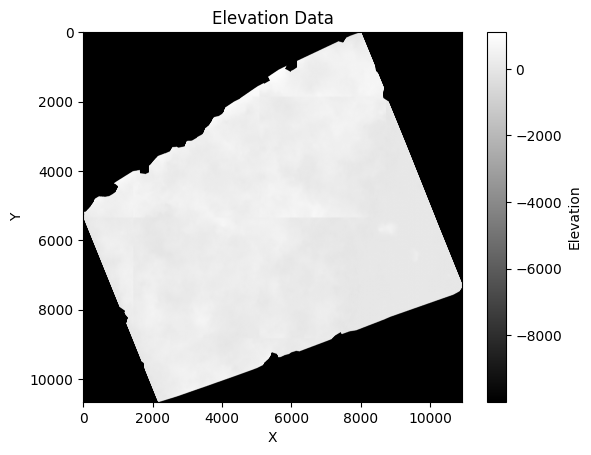

In [ ]:
# HOW TO MAKE A FIGURE WITH THE DATA
plt.imshow(raster, cmap='gray')
plt.colorbar(label='Elevation')
plt.title('Elevation Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()